In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "liguria"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,7,Liguria,1,0,1,0,1,1,1,...,0.0,38.0,0.0,0.0,0.00,100.00,2.63,0.00,0.00,0.00
1,2020-02-26T18:00:00,7,Liguria,6,0,6,5,11,10,10,...,0.0,27.0,0.0,5.0,0.00,54.55,37.04,0.00,0.00,1000.00
2,2020-02-27T18:00:00,7,Liguria,9,0,9,10,19,8,8,...,0.0,12.0,0.0,5.0,0.00,47.37,66.67,0.00,0.00,72.73
3,2020-02-28T18:00:00,7,Liguria,9,0,9,10,19,0,0,...,0.0,34.0,0.0,0.0,0.00,47.37,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,7,Liguria,4,1,5,33,38,19,23,...,0.0,9.0,0.0,23.0,20.00,13.16,255.56,0.00,0.00,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2020-11-29T17:00:00,7,Liguria,970,111,1081,11525,12606,-119,437,...,19.0,3859.0,1154.0,-115.0,10.27,8.58,11.32,37.87,-5.13,-0.94
279,2020-11-30T17:00:00,7,Liguria,997,113,1110,11106,12216,-390,236,...,7.0,2101.0,720.0,-419.0,10.18,9.09,11.23,32.78,1.80,-3.09
280,2020-12-01T17:00:00,7,Liguria,1003,105,1108,11042,12150,-66,339,...,17.0,4300.0,1326.0,-64.0,9.48,9.12,7.88,25.57,-7.08,-0.54
281,2020-12-02T17:00:00,7,Liguria,963,102,1065,10934,11999,-151,349,...,19.0,4620.0,1320.0,-108.0,9.58,8.88,7.55,26.44,-2.86,-1.24


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 3, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 422
Nuovi tamponi: 4957.0
Percentuale nuovi positivi/nuovi tamponi: 8.5 %
Nuovi guariti: 937.0
Nuovi deceduti: 26.0
Variazione positivi ricoverati con sintomi: -31.0
Variazione positivi in terapia intensiva: 0.0
Variazione positivi in isolamento dimiciliare: -510.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 3, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-04T17:00:00,7,Liguria,167,23,190,1687,1877,17,121,...,1.0,2385.0,1252.0,15.0,12.11,10.12,5.07,9.66,9.52,0.91
1,2020-10-05T17:00:00,7,Liguria,180,24,204,1703,1907,30,107,...,0.0,1594.0,813.0,16.0,11.76,10.70,6.71,13.16,4.35,1.60
2,2020-10-06T17:00:00,7,Liguria,178,23,201,1724,1925,18,170,...,2.0,3325.0,1706.0,21.0,11.44,10.44,5.11,9.96,-4.17,0.94
3,2020-10-07T17:00:00,7,Liguria,196,24,220,1812,2032,107,176,...,2.0,3726.0,1781.0,88.0,10.91,10.83,4.72,9.88,4.35,5.56
4,2020-10-08T17:00:00,7,Liguria,195,28,223,1932,2155,123,152,...,0.0,3857.0,2032.0,120.0,12.56,10.35,3.94,7.48,16.67,6.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-29T17:00:00,7,Liguria,970,111,1081,11525,12606,-119,437,...,19.0,3859.0,1154.0,-115.0,10.27,8.58,11.32,37.87,-5.13,-0.94
57,2020-11-30T17:00:00,7,Liguria,997,113,1110,11106,12216,-390,236,...,7.0,2101.0,720.0,-419.0,10.18,9.09,11.23,32.78,1.80,-3.09
58,2020-12-01T17:00:00,7,Liguria,1003,105,1108,11042,12150,-66,339,...,17.0,4300.0,1326.0,-64.0,9.48,9.12,7.88,25.57,-7.08,-0.54
59,2020-12-02T17:00:00,7,Liguria,963,102,1065,10934,11999,-151,349,...,19.0,4620.0,1320.0,-108.0,9.58,8.88,7.55,26.44,-2.86,-1.24


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

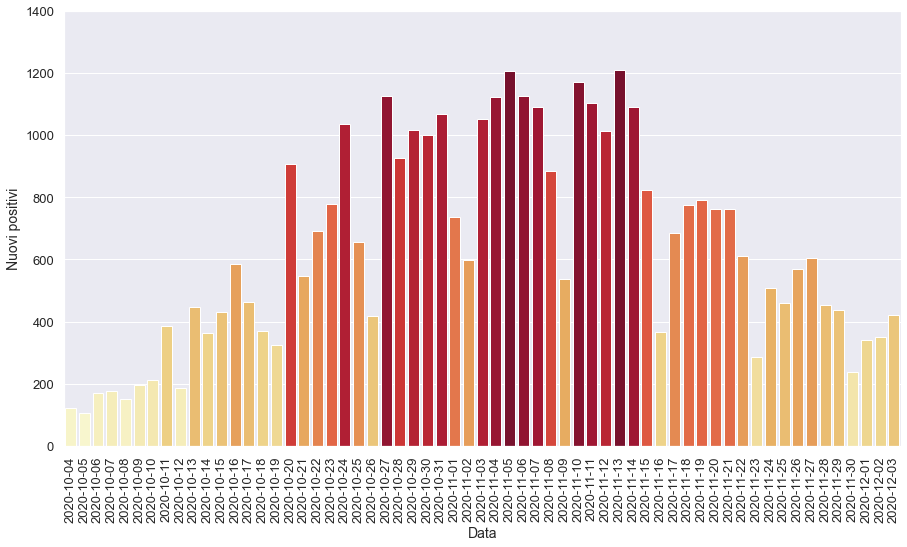

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

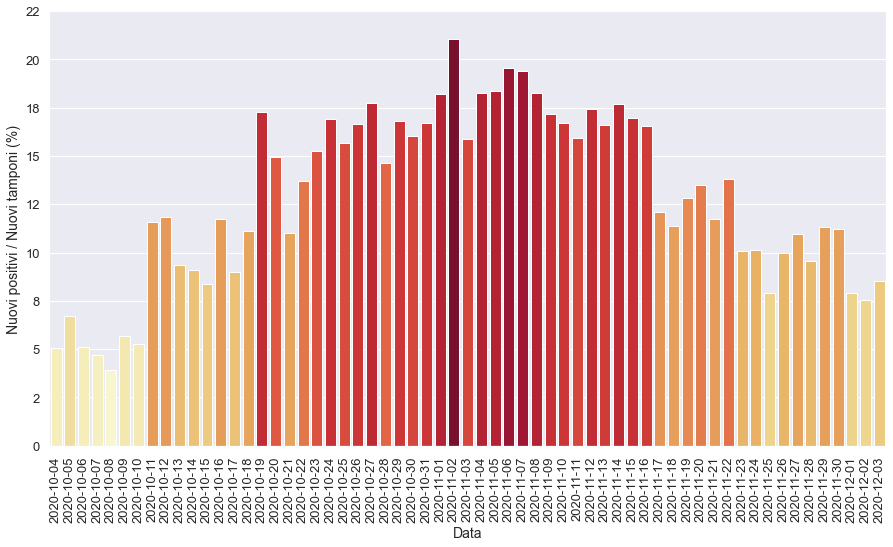

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

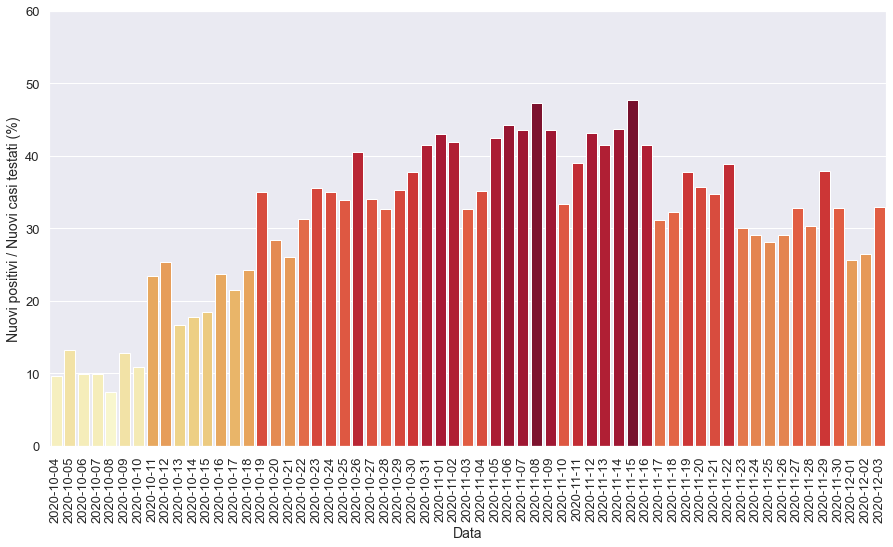

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

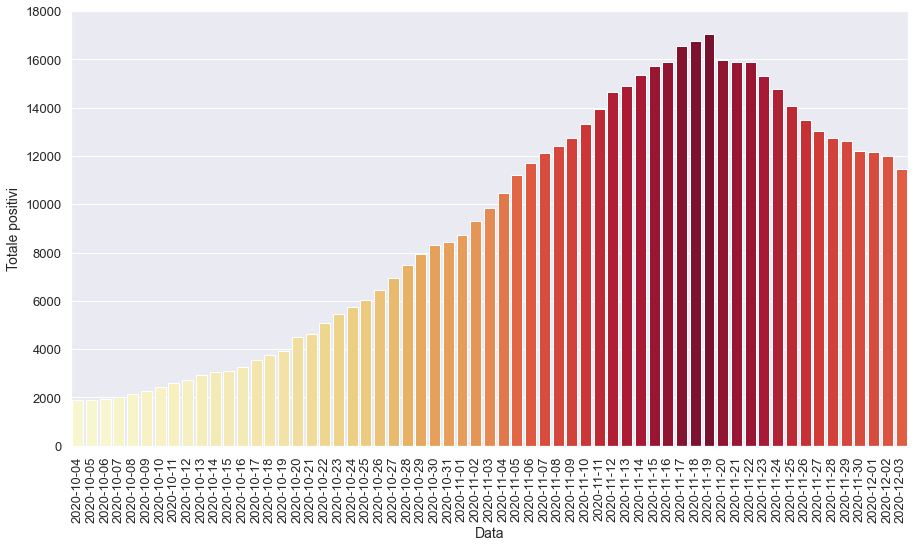

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

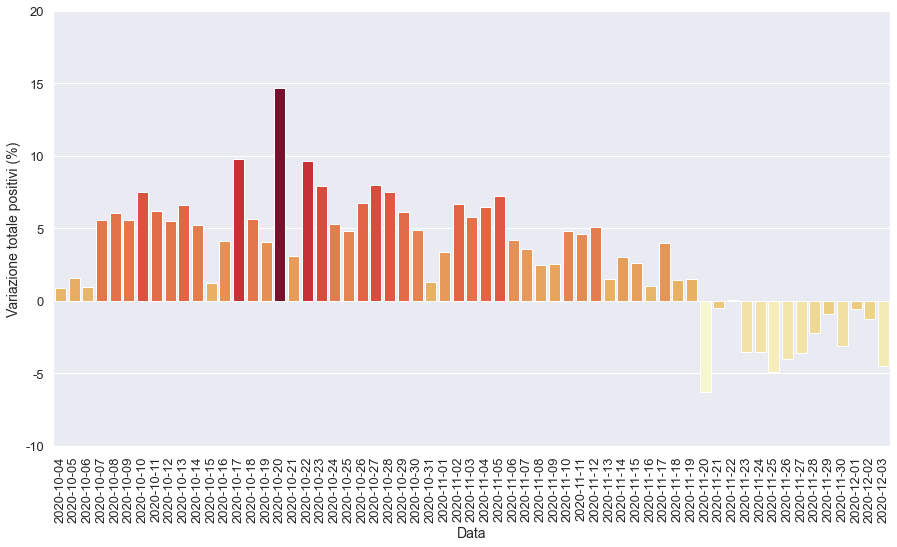

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

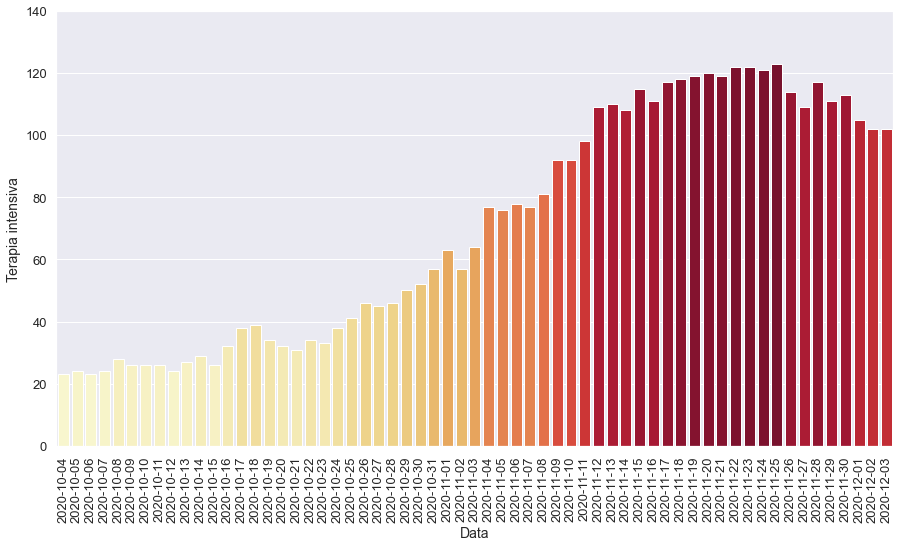

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

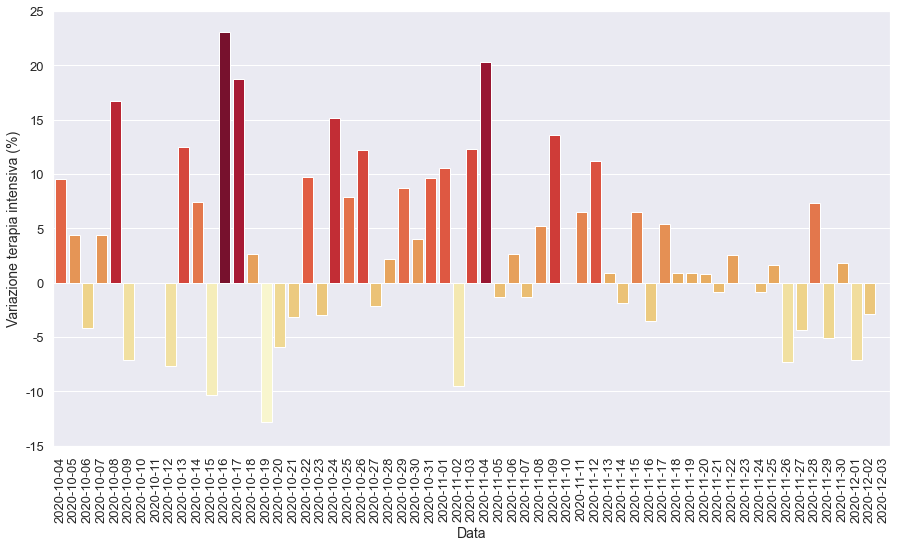

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

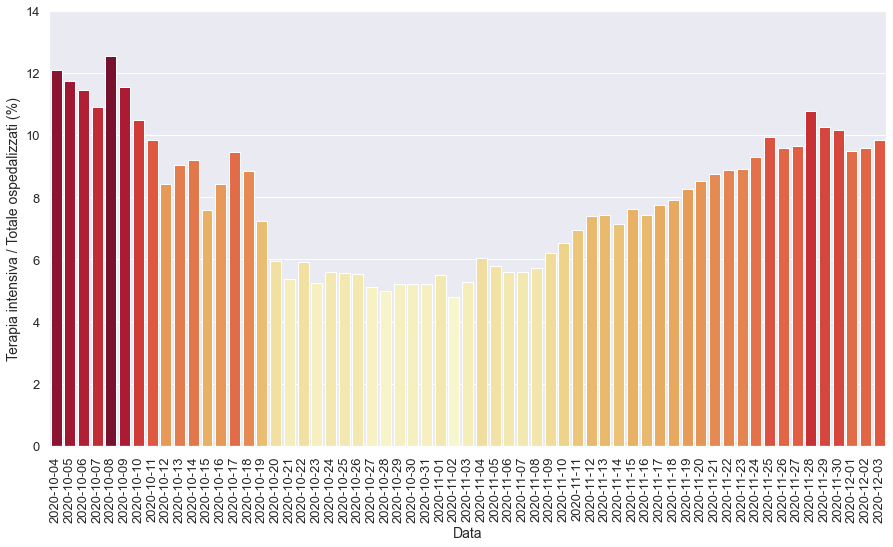

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

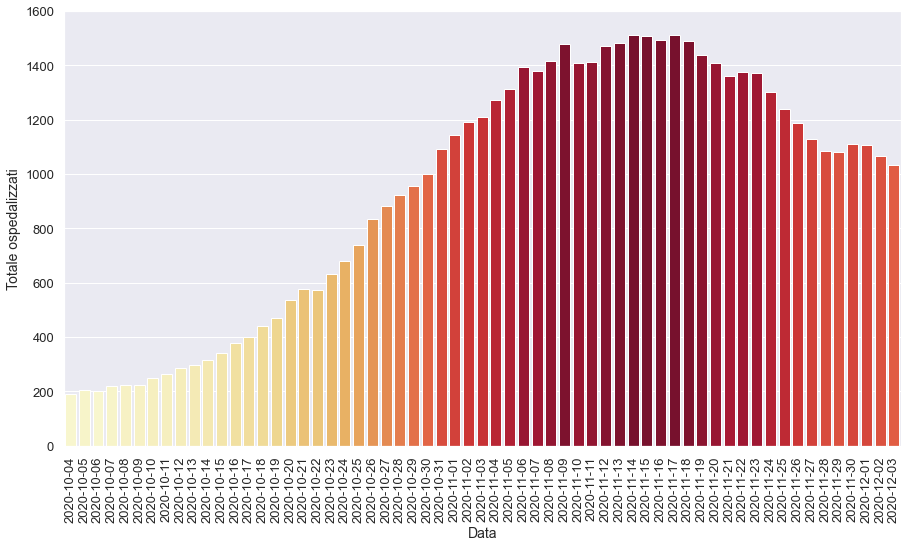

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

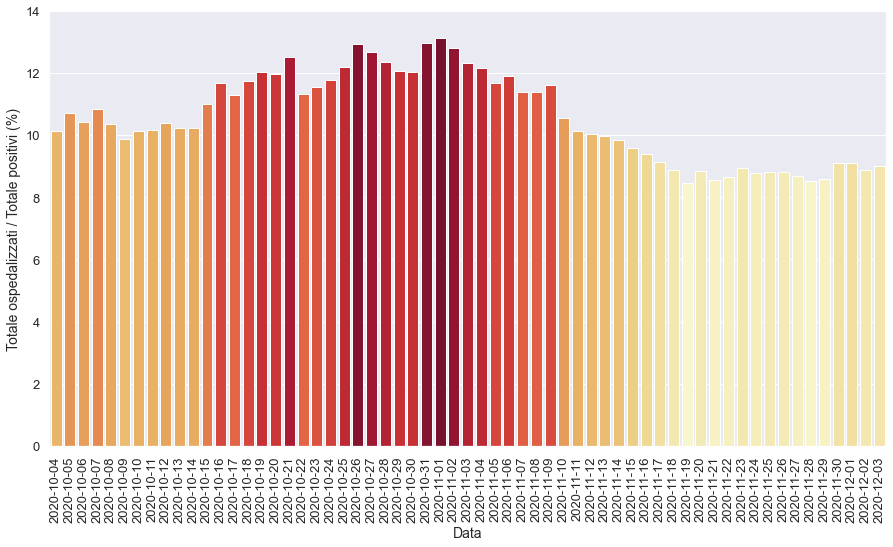

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

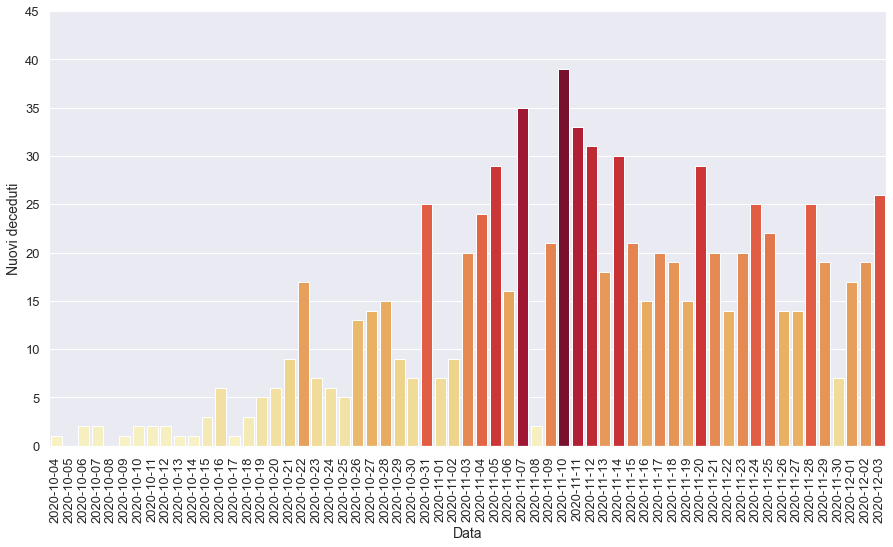

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

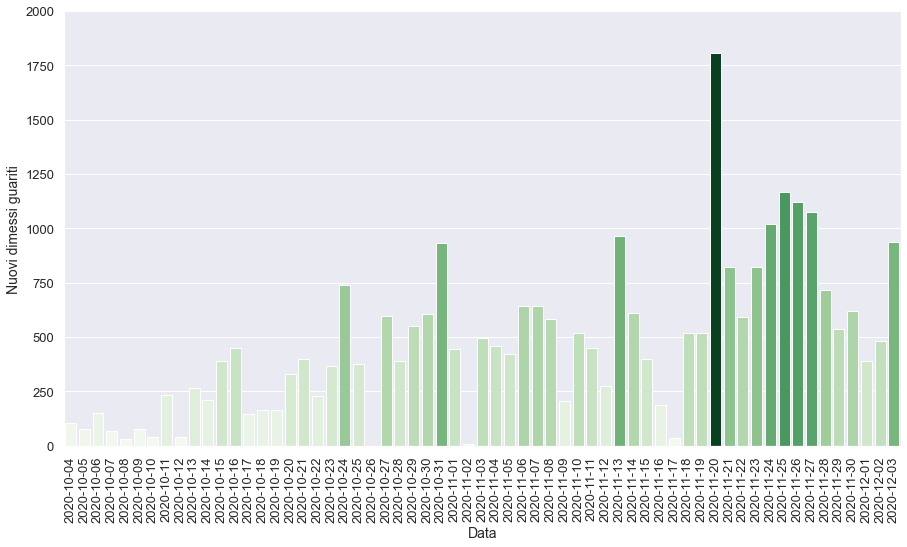

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-03T17:00:00,7,Liguria,1147,64,1211,8618,9829,535,1052,...,20.0,6619.0,3215.0,514.0,5.28,12.32,15.89,32.72,12.28,5.76
1,2020-11-04T17:00:00,7,Liguria,1196,77,1273,9194,10467,638,1122,...,24.0,6141.0,3194.0,576.0,6.05,12.16,18.27,35.13,20.31,6.49
2,2020-11-05T17:00:00,7,Liguria,1236,76,1312,9911,11223,756,1208,...,29.0,6587.0,2849.0,717.0,5.79,11.69,18.34,42.40,-1.30,7.22
3,2020-11-06T17:00:00,7,Liguria,1315,78,1393,10299,11692,469,1127,...,16.0,5772.0,2546.0,388.0,5.60,11.91,19.53,44.27,2.63,4.18
4,2020-11-07T17:00:00,7,Liguria,1303,77,1380,10728,12108,416,1092,...,35.0,5630.0,2508.0,429.0,5.58,11.40,19.40,43.54,-1.28,3.56
5,2020-11-08T17:00:00,7,Liguria,1334,81,1415,10993,12408,300,886,...,2.0,4856.0,1873.0,265.0,5.72,11.40,18.25,47.30,5.19,2.48
6,2020-11-09T17:00:00,7,Liguria,1387,92,1479,11242,12721,313,538,...,21.0,3130.0,1236.0,249.0,6.22,11.63,17.19,43.53,13.58,2.52
7,2020-11-10T17:00:00,7,Liguria,1315,92,1407,11929,13336,615,1172,...,39.0,7022.0,3513.0,687.0,6.54,10.55,16.69,33.36,0.00,4.83
8,2020-11-11T17:00:00,7,Liguria,1315,98,1413,12542,13955,619,1102,...,33.0,6922.0,2822.0,613.0,6.94,10.13,15.92,39.05,6.52,4.64
9,2020-11-12T17:00:00,7,Liguria,1363,109,1472,13189,14661,706,1013,...,31.0,5807.0,2344.0,647.0,7.40,10.04,17.44,43.22,11.22,5.06


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

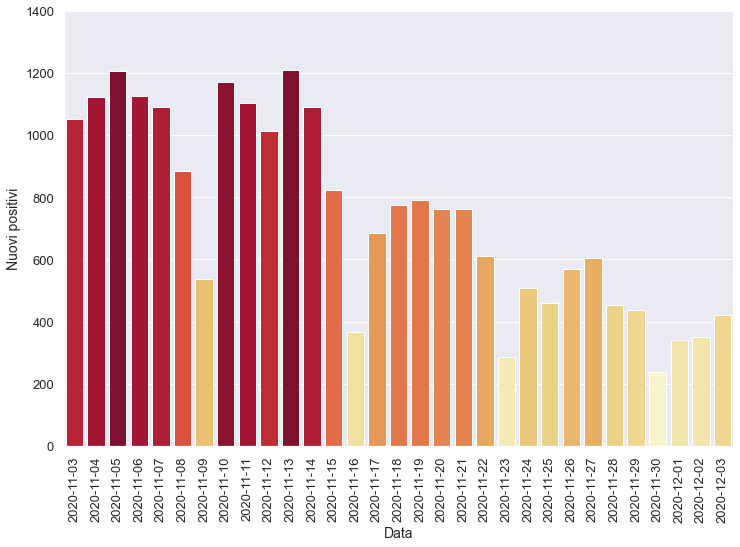

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

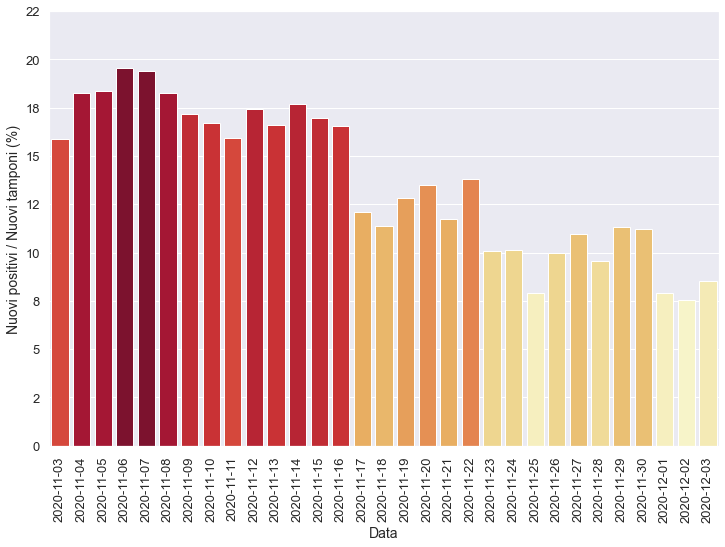

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

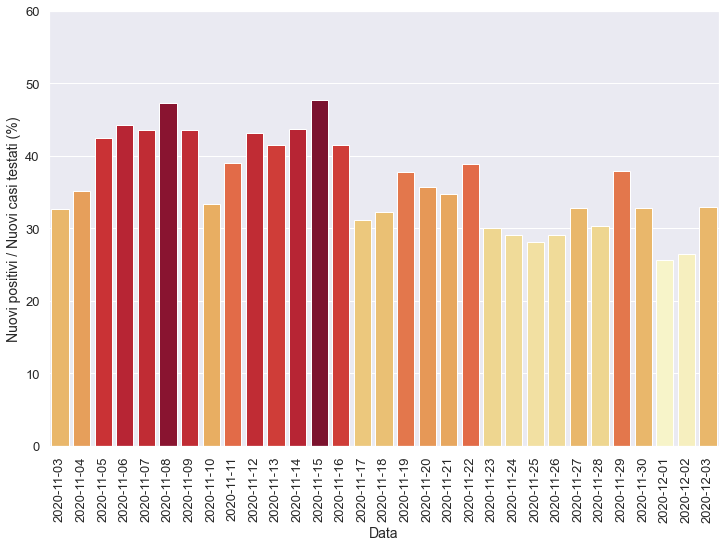

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

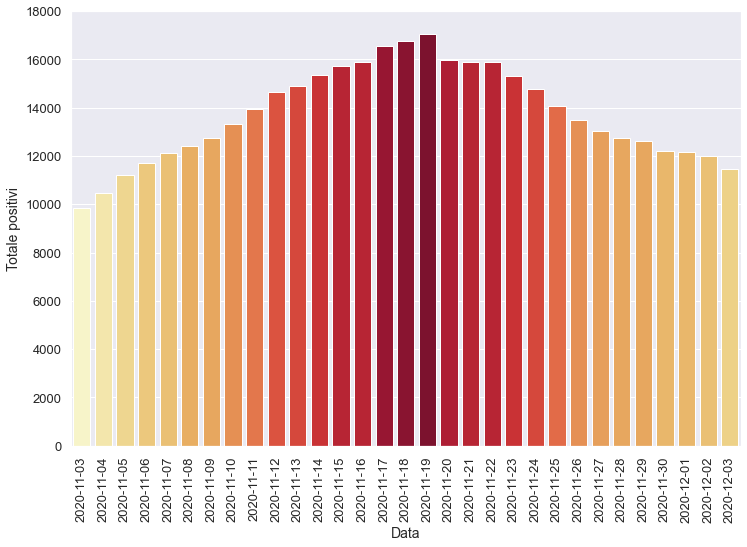

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

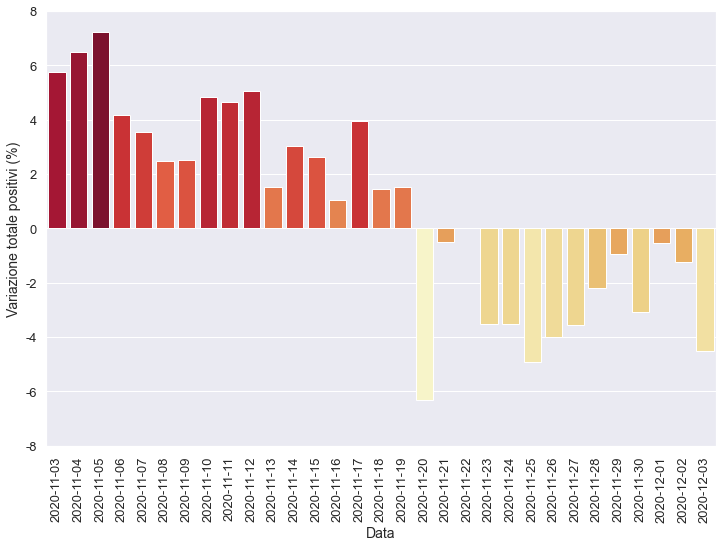

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

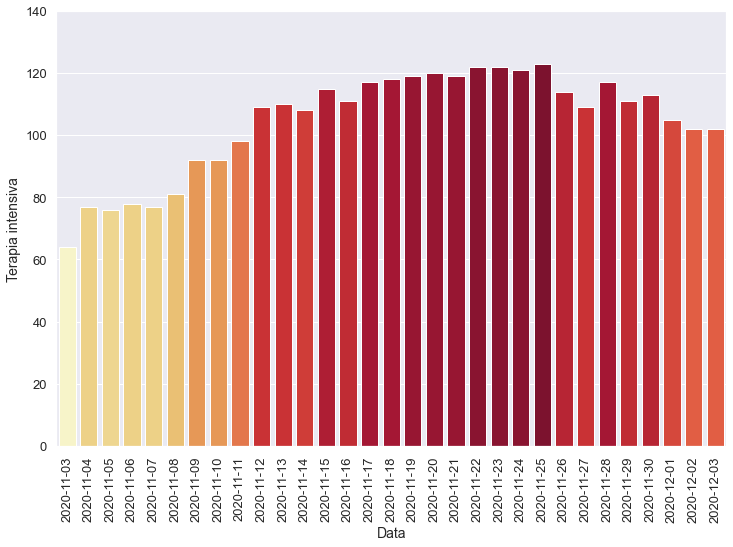

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

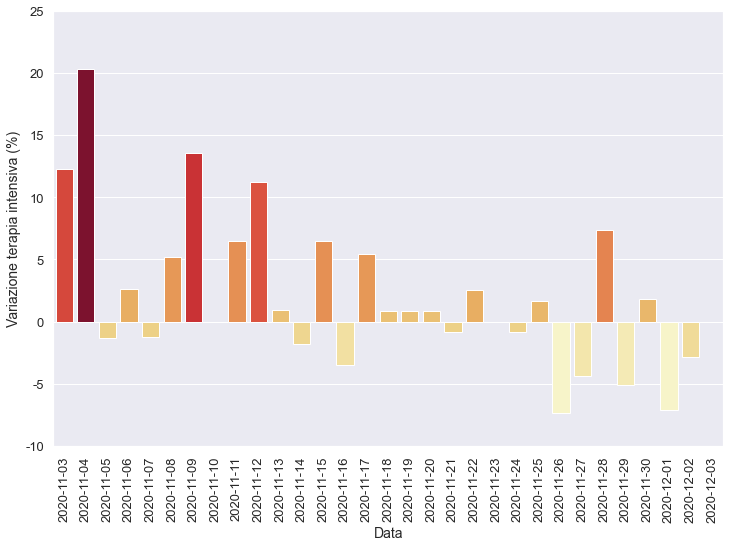

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

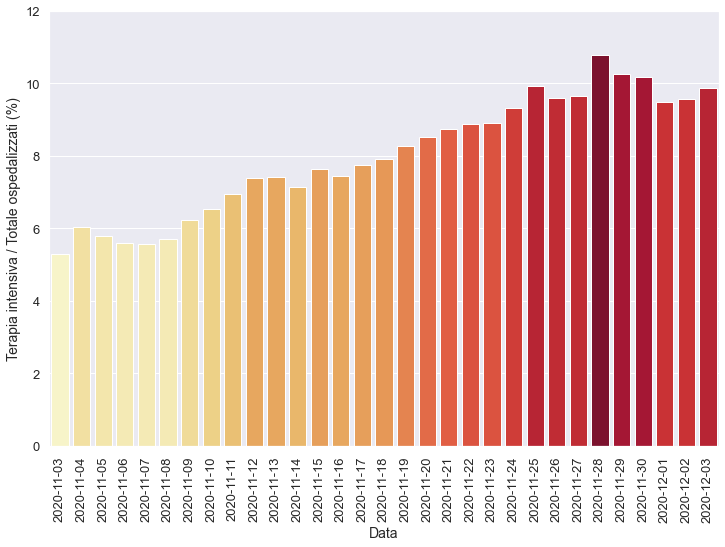

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

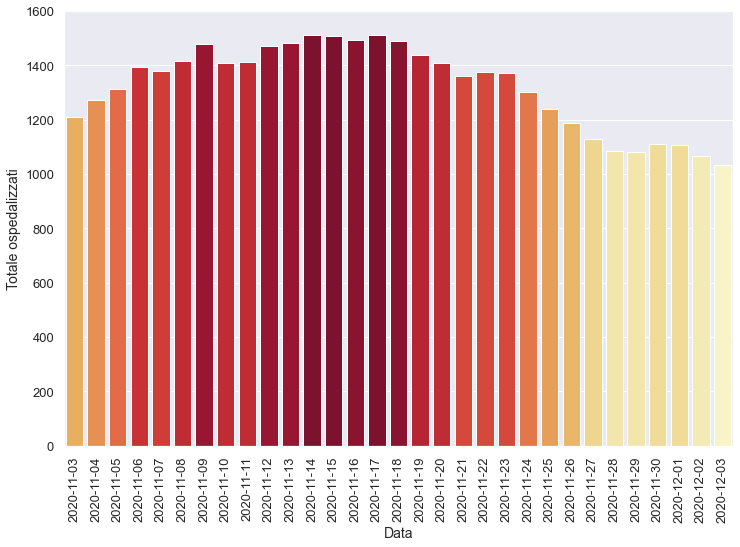

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

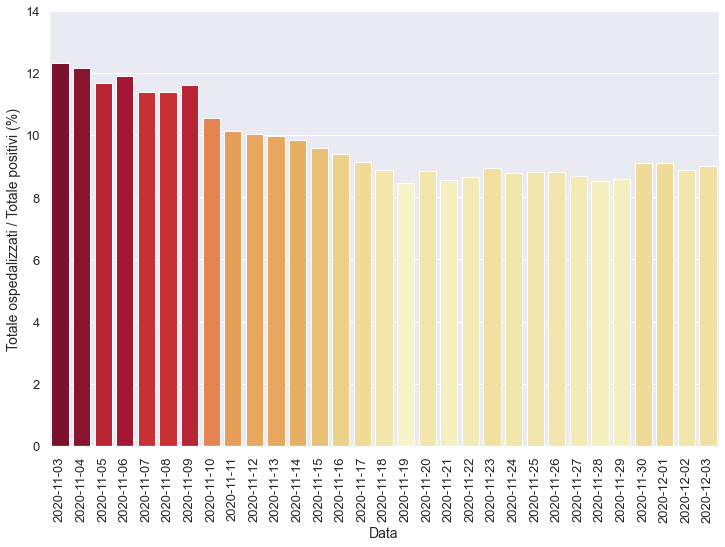

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

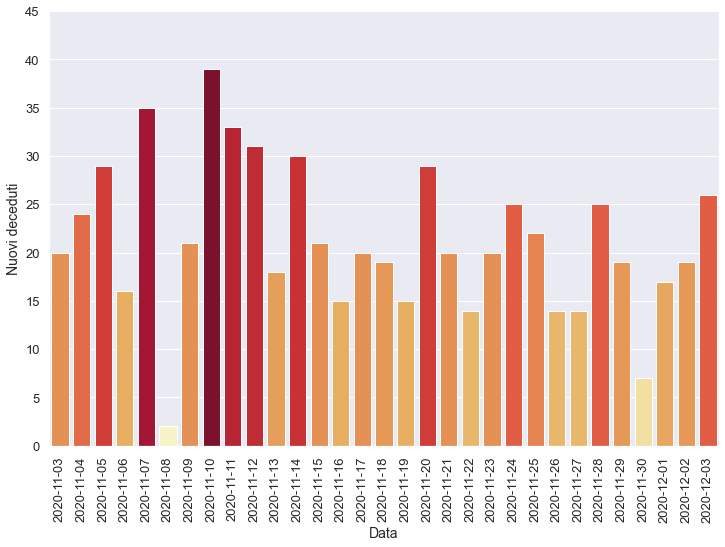

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

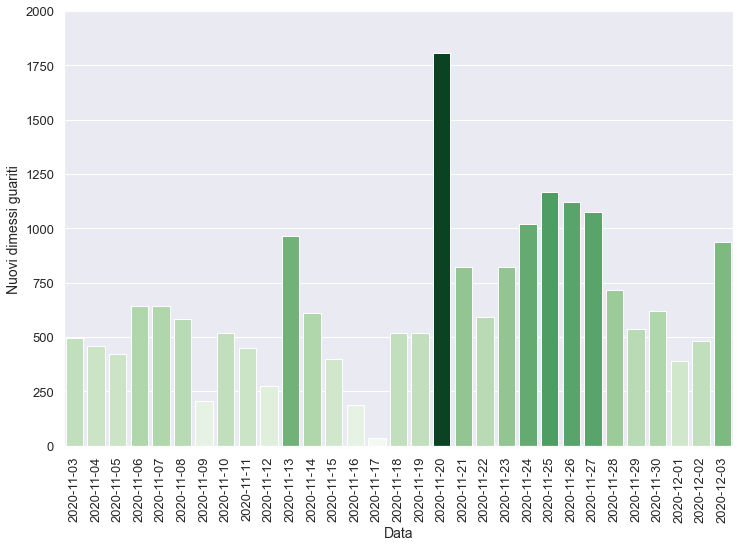

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-26T17:00:00,7,Liguria,1075,114,1189,12303,13492,-563,570,...,14.0,5705.0,1959.0,-514.0,9.59,8.81,9.99,29.10,-7.32,-4.01
1,2020-11-27T17:00:00,7,Liguria,1019,109,1128,11883,13011,-481,606,...,14.0,5532.0,1850.0,-420.0,9.66,8.67,10.95,32.76,-4.39,-3.57
2,2020-11-28T17:00:00,7,Liguria,968,117,1085,11640,12725,-286,454,...,25.0,4740.0,1496.0,-243.0,10.78,8.53,9.58,30.35,7.34,-2.20
3,2020-11-29T17:00:00,7,Liguria,970,111,1081,11525,12606,-119,437,...,19.0,3859.0,1154.0,-115.0,10.27,8.58,11.32,37.87,-5.13,-0.94
4,2020-11-30T17:00:00,7,Liguria,997,113,1110,11106,12216,-390,236,...,7.0,2101.0,720.0,-419.0,10.18,9.09,11.23,32.78,1.80,-3.09
5,2020-12-01T17:00:00,7,Liguria,1003,105,1108,11042,12150,-66,339,...,17.0,4300.0,1326.0,-64.0,9.48,9.12,7.88,25.57,-7.08,-0.54
6,2020-12-02T17:00:00,7,Liguria,963,102,1065,10934,11999,-151,349,...,19.0,4620.0,1320.0,-108.0,9.58,8.88,7.55,26.44,-2.86,-1.24
7,2020-12-03T17:00:00,7,Liguria,932,102,1034,10424,11458,-541,422,...,26.0,4957.0,1282.0,-510.0,9.86,9.02,8.51,32.92,0.00,-4.51


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

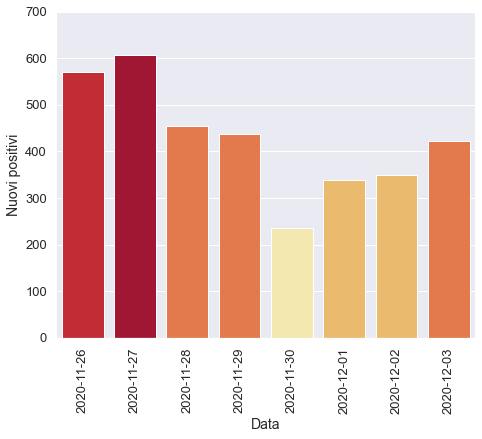

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

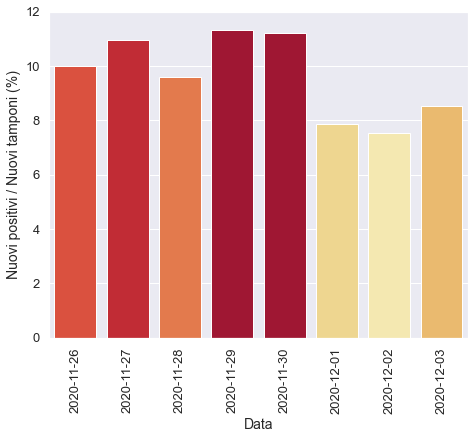

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

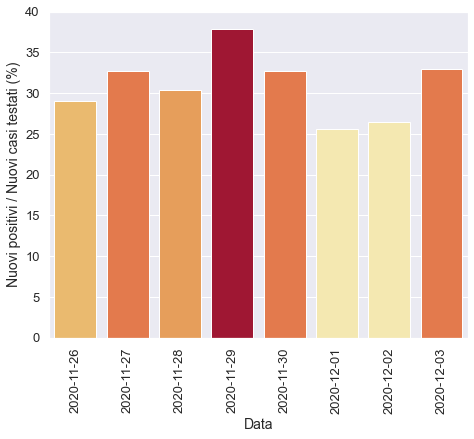

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

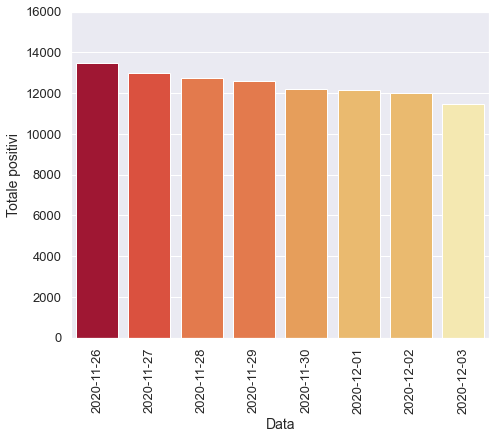

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

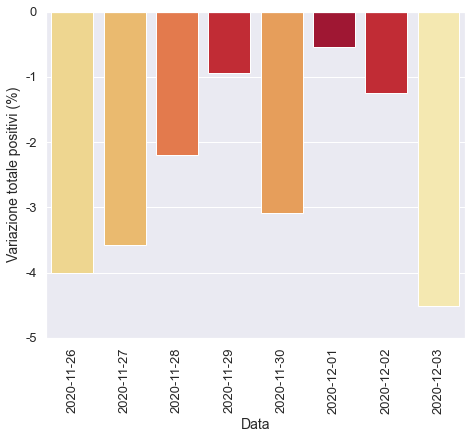

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

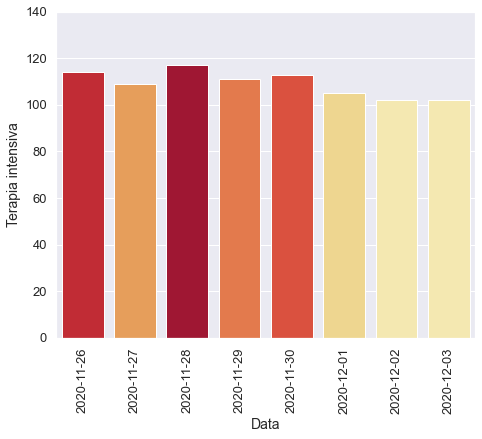

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

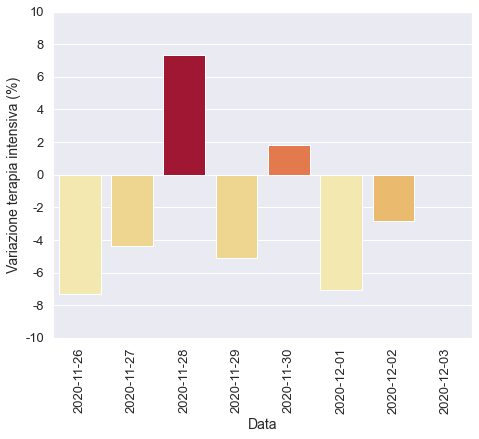

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

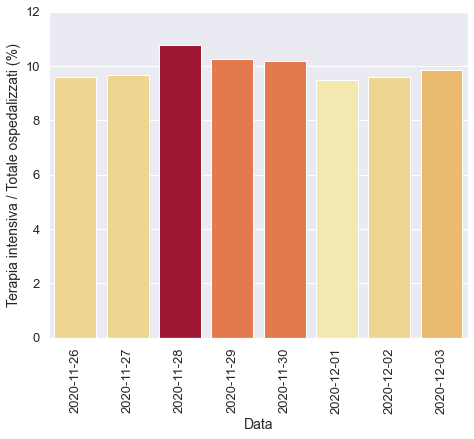

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

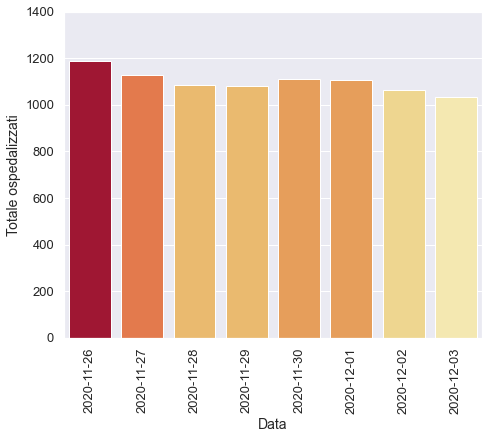

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

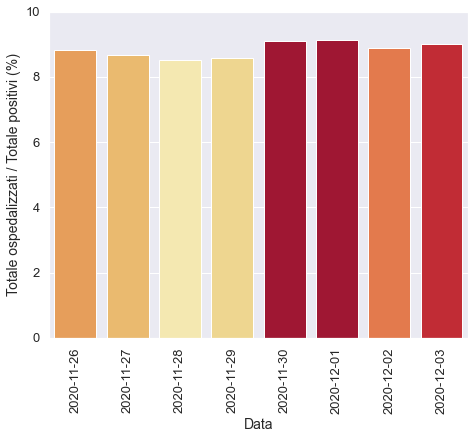

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

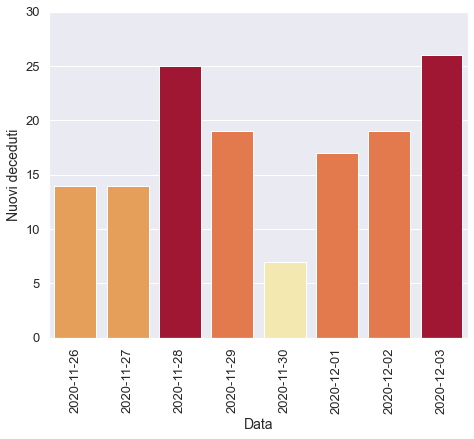

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

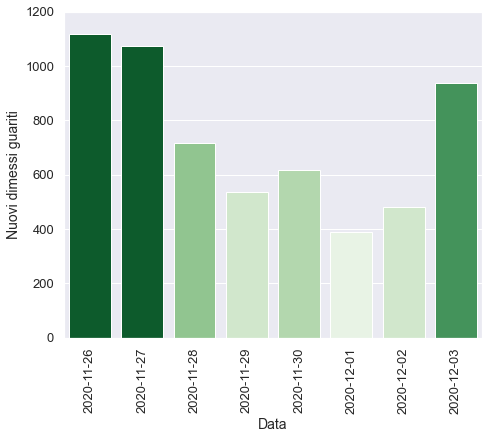

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)